In [1]:
import pandas as pd
import numpy as np
import math
import statsmodels.api as sm
import missingno


import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('D:/Dataset/DC_Properties.csv')
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_12528\990640256.py:1: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('D:/Dataset/DC_Properties.csv')


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [4]:
df=df.drop(columns=['Unnamed: 0'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 48 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   BATHRM              158957 non-null  int64  
 1   HF_BATHRM           158957 non-null  int64  
 2   HEAT                158957 non-null  object 
 3   AC                  158957 non-null  object 
 4   NUM_UNITS           106696 non-null  float64
 5   ROOMS               158957 non-null  int64  
 6   BEDRM               158957 non-null  int64  
 7   AYB                 158686 non-null  float64
 8   YR_RMDL             80928 non-null   float64
 9   EYB                 158957 non-null  int64  
 10  STORIES             106652 non-null  float64
 11  SALEDATE            132187 non-null  object 
 12  PRICE               98216 non-null   float64
 13  QUALIFIED           158957 non-null  object 
 14  SALE_NUM            158957 non-null  int64  
 15  GBA                 106696 non-nul

In [6]:
df.count()

BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             106696
ROOMS                 158957
BEDRM                 158957
AYB                   158686
YR_RMDL                80928
EYB                   158957
STORIES               106652
SALEDATE              132187
PRICE                  98216
QUALIFIED             158957
SALE_NUM              158957
GBA                   106696
BLDG_NUM              158957
STYLE                 106696
STRUCT                106696
GRADE                 106696
CNDTN                 106696
EXTWALL               106696
ROOF                  106696
INTWALL               106696
KITCHENS              106695
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM              52261
LIVING_GBA             52261
FULLADDRESS           106040
CITY                  106051
STATE         

In [7]:
df.shape

(158957, 48)

In [9]:
def unival (dataset):
    col=dataset.columns
    col_name=[]
    n_unique=[]
    unique_val=[]
    for i in col:
        col_name.append(i)
        n_unique.append(dataset[i].nunique())
        unique_val.append(dataset[i].unique())
    dfr=pd.DataFrame({'col_name':col_name,'n_unique':n_unique,'unique_val':unique_val})
    return dfr

In [10]:
unival(df)

,col_name,n_unique,unique_val
0,BATHRM,15,"[4, 3, 2, 1, 5, 6, 7, 8, 11, 9, 0, 10, 12, 14,..."
1,HF_BATHRM,10,"[0, 1, 2, 3, 4, 5, 6, 7, 9, 11]"
2,HEAT,14,"[Warm Cool, Hot Water Rad, Forced Air, Elec Ba..."
3,AC,3,"[Y, N, 0]"
4,NUM_UNITS,7,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0, 6.0, nan]"
5,ROOMS,40,"[8, 11, 9, 10, 5, 7, 6, 12, 16, 14, 13, 4, 15,..."
6,BEDRM,20,"[4, 5, 3, 2, 6, 7, 1, 8, 9, 10, 11, 0, 20, 12,..."
7,AYB,220,"[1910.0, 1898.0, 1900.0, 1913.0, 1917.0, 1906...."
8,YR_RMDL,110,"[1988.0, 2007.0, 2009.0, 2003.0, 2012.0, nan, ..."
9,EYB,135,"[1972, 1984, 1985, 1957, 1967, 1950, 1954, 196..."


## EDA

In [11]:
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

df['PRICE'].describe()

count       98216.00
mean       931351.59
std       7061324.96
min             1.00
25%        240000.00
50%        399999.00
75%        652000.00
max     137427545.00
Name: PRICE, dtype: float64

Text(0.5, 1.0, 'Distribusi variabel PRICE')

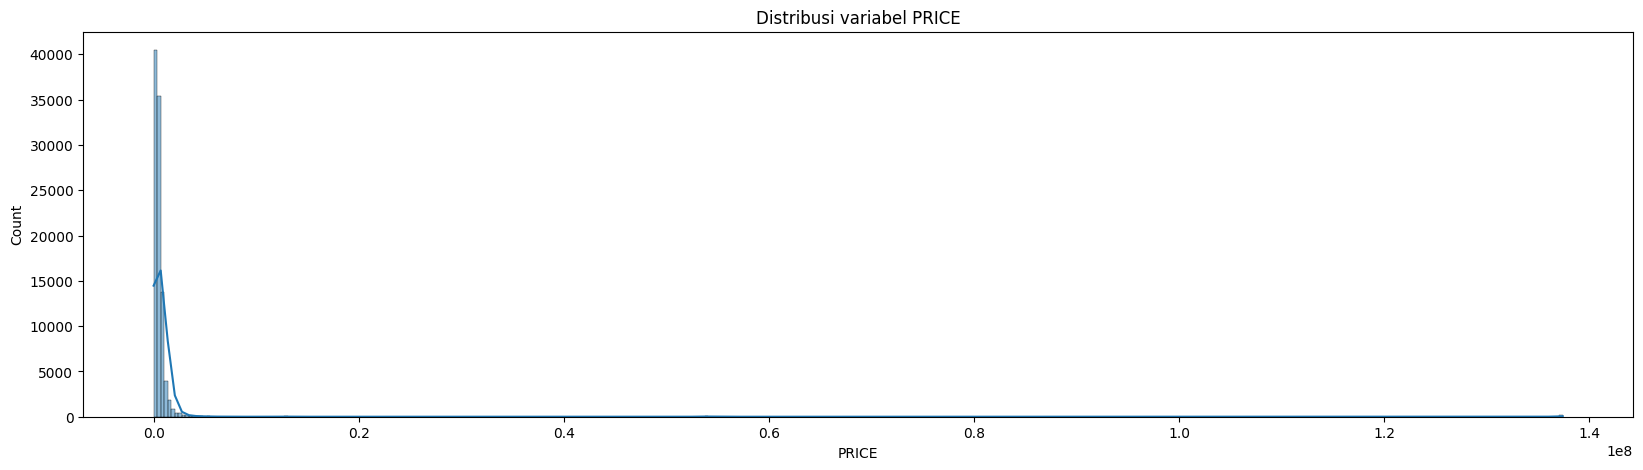

In [12]:
plt.figure(figsize=[20,5])
sns.histplot(df['PRICE'],bins=399,kde=True)
plt.title('Distribusi variabel PRICE')

Text(0.5, 1.0, 'Distribusi variable PRICE')

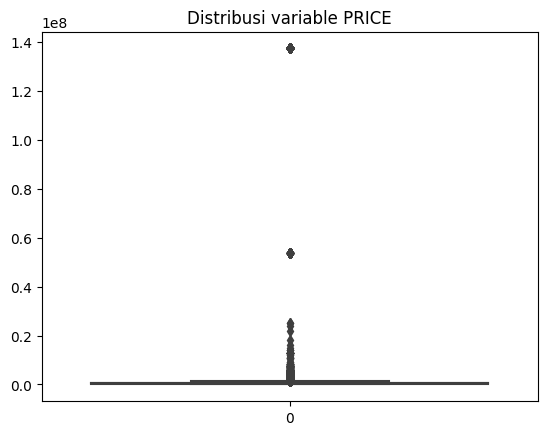

In [13]:
sns.boxplot(df['PRICE'])
plt.title('Distribusi variable PRICE')

Berdasarkan histogram diatas, bisa dilihat bahwa pada variabel 'PRICE' terdapat right-skewness distribution, dimana mayoritas data menumpuk di sebelah kiri dan menyebar di sebelah kanan. selain itu dengan boxplot kita dapat mengkonfirmasi pada variabel ini juga terdapat outlier yang sangat tinggi.

Harga properti di daerah Washington DC memiliki harga yang bervariasi mulai dari 1 hingga 137427545 dollar dimana mayoritas rumah berdasarkan median bernilai 399999 dollar





### **Distribusi variabel berdasarkan area**

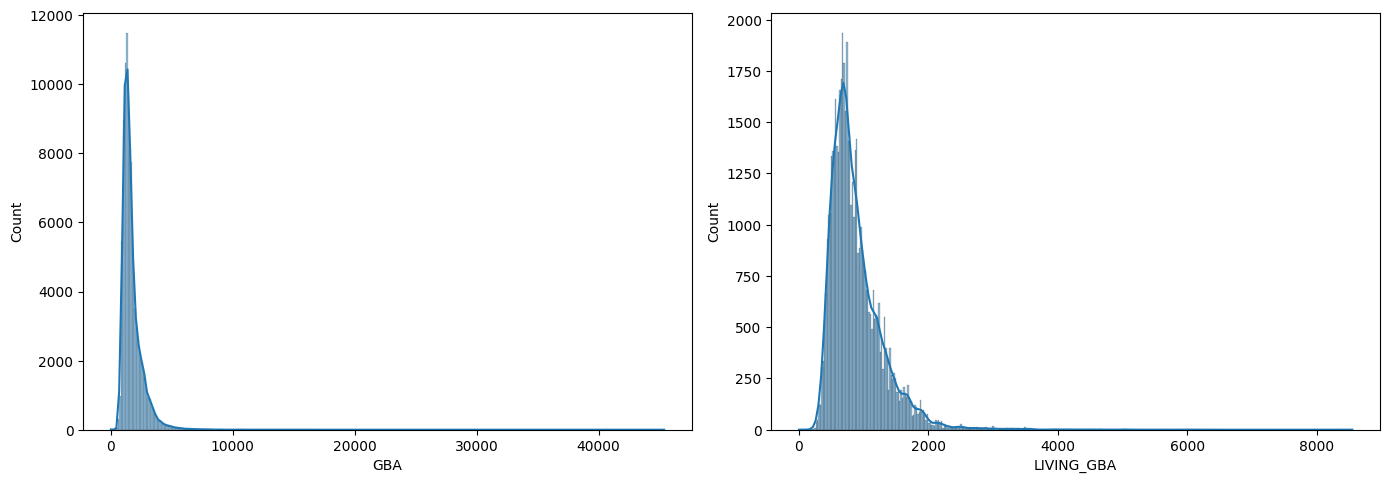

In [14]:
area_var=['GBA', 'LIVING_GBA']
count=0
fig=plt.figure(figsize=[14,14])
for i in area_var:
    count+=1
    
    plt.subplot(3,2,count)
    sns.histplot(x=df[i],bins=398,kde=True)
    fig.tight_layout()

Untuk variabel GBA dan LIVING_GBA jika dilihat distribusi ada kesamaan antara 2 variable ini dengan variabel price dimana pada distribusinya masih ada kecenderungan right-skewness dan juga terindikasi adanya outlier pada dua variabel. Kemungkinan 2 variabel ini memiliki korelasi dengan variabel price.

Kita bisa berasumsi bahwa area properti mempengaruhi harga properti. Properti dengan luas yang kecil akan memiliki harga yang murah sementara properti dengan luas area yang besar akan memiliki harga yang besar pula. Hal ini masuk akal jika dilihat dari distribusi  ketiga variable tersebut. Mari kita lihat hubungan kedua variabel ini melalui scatter plot.

In [15]:
df_sample=df.sample(frac=0.05,random_state=10)

iqr=412000
price_low= 240000-1.5*iqr
price_upper=652000+1.5*iqr

area_var=['GBA','LIVING_GBA','LANDAREA']
area_upper=[]

for i in area_var:
    iqr=df[i].quantile(0.75)-df[i].quantile(0.25)
    upper_whisk=df[i].quantile(0.75)+1.5*iqr
    area_upper.append(upper_whisk)

In [16]:
area_upper

[3130.0, 1726.0, 6454.5]

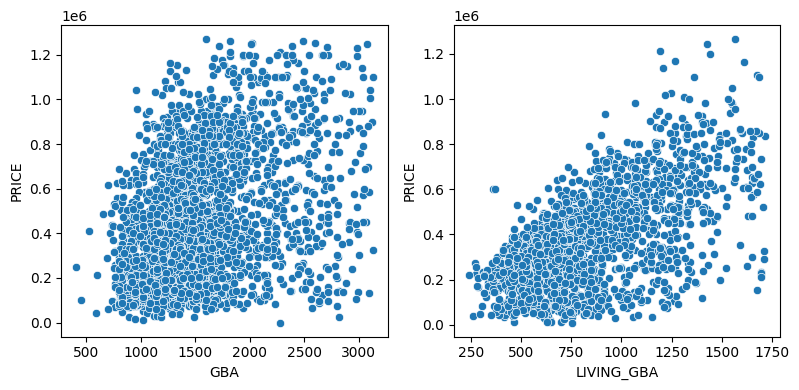

In [17]:
fig,axes=plt.subplots(1,2,figsize=[8,4])
sns.scatterplot(ax=axes[0],x=df_sample[df_sample['GBA']<area_upper[0]]['GBA'],y=df_sample[df_sample['PRICE']<price_upper]['PRICE'])
sns.scatterplot(ax=axes[1],x=df_sample[df_sample['LIVING_GBA']<area_upper[1]]['LIVING_GBA'],y=df_sample[df_sample['PRICE']<price_upper]['PRICE'])
plt.tight_layout()

Dari scatter plot di atas, masih ada kecenderungan hubungan positif dimana ada area kosong di sudut kiri atas dan di sudut kanan bawah.

<Axes: xlabel='LANDAREA', ylabel='Count'>

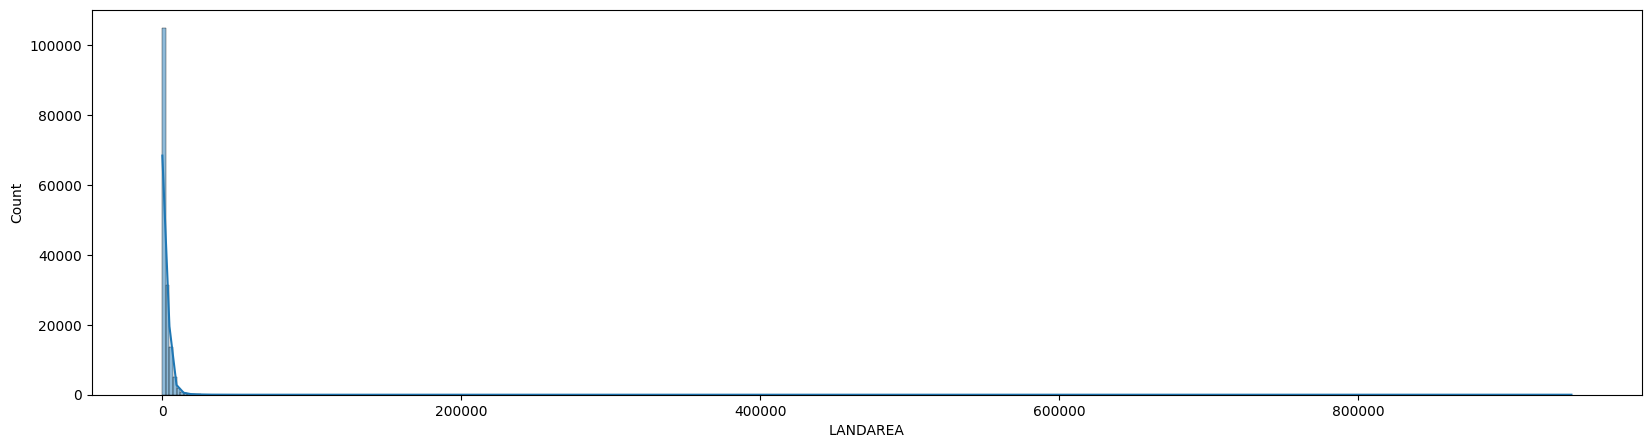

In [18]:
plt.figure(figsize=[20,5])
sns.histplot(df['LANDAREA'],bins=398,kde=True)

Hampir sama dengan 2 variabel sebelumnya, LANDAREA juga memiliki pola distribusi yang mirip dengan variabel PRICE serta adanya outlier pada variabel ini



<Axes: xlabel='LANDAREA', ylabel='PRICE'>

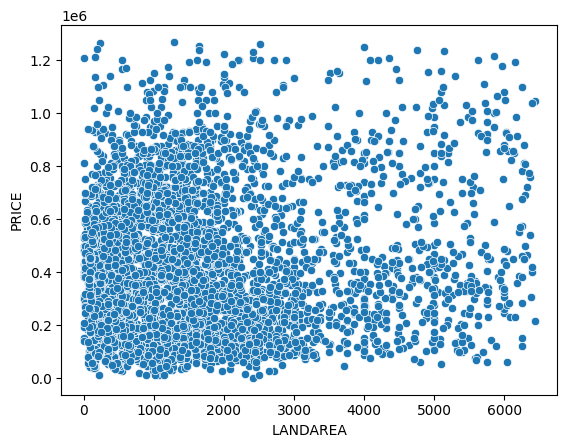

In [19]:
sns.scatterplot(x=df_sample[df_sample['LANDAREA']<area_upper[2]]['LANDAREA'],y=df_sample[df_sample['PRICE']<price_upper]['PRICE'])

Jika dilihat melalui scatter plot, tidak terlihat adanya pola korelasi linier antara kedua variabel.

### **Tahun**

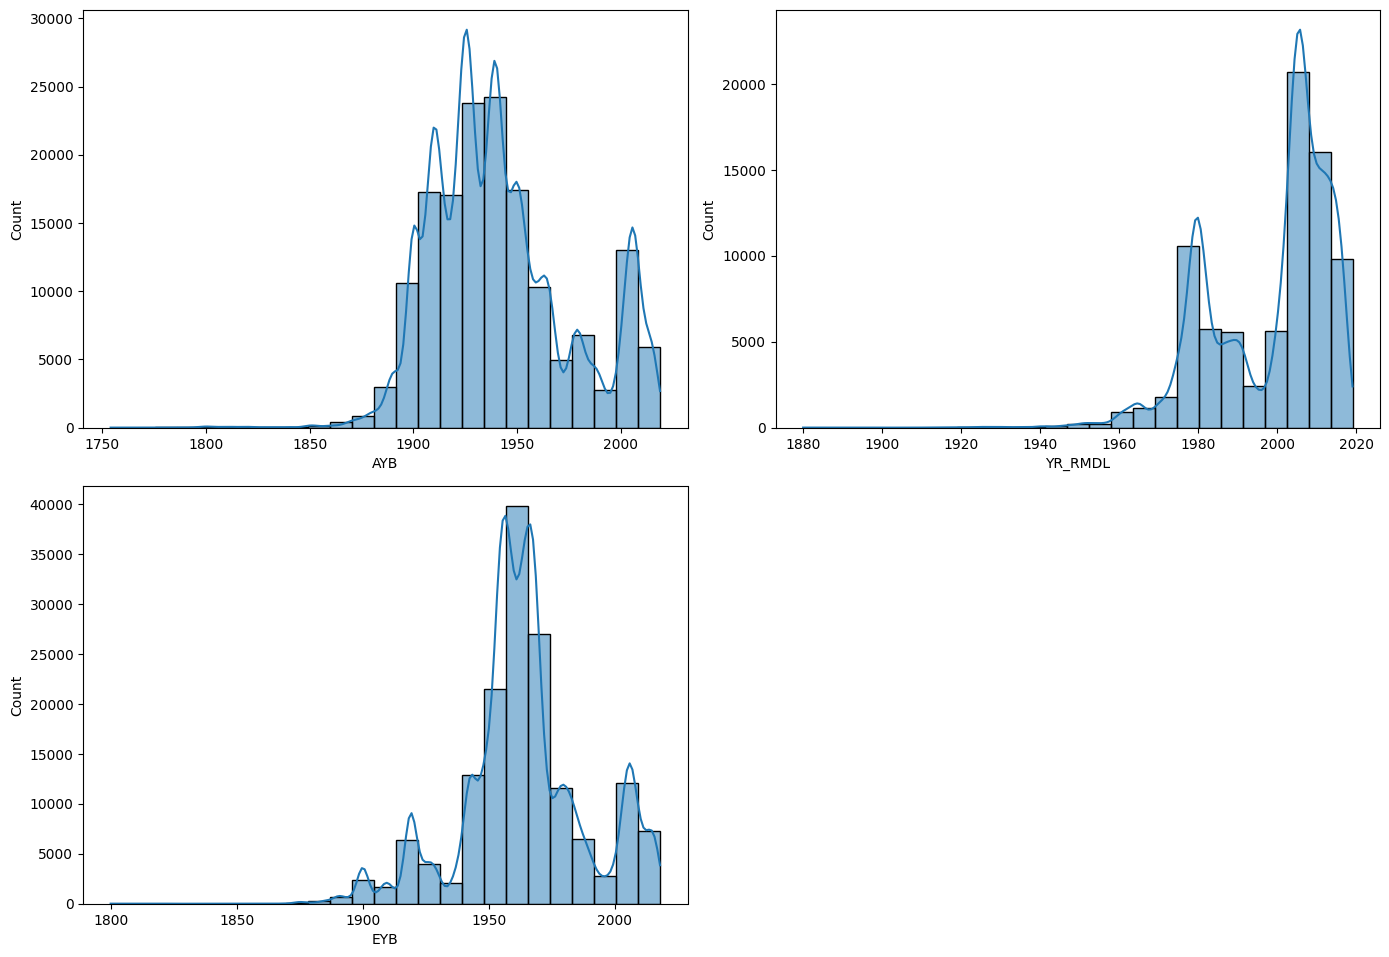

In [20]:

area_var=['AYB', 'YR_RMDL', 'EYB']
area=pd.DataFrame(df[area_var])
area.median
count=0
alt_df=df.drop(index=56600)
fig=plt.figure(figsize=[14,14])
for i in area_var:
    count+=1
    
    plt.subplot(3,2,count)
    sns.histplot(x=alt_df[i],bins=25,kde=True)
    fig.tight_layout()
    

In [21]:
area.describe()

,AYB,YR_RMDL,EYB
count,158686.00,80928.00,158957.00
mean,1941.99,1998.24,1963.72
std,33.64,16.58,24.92
min,1754.00,20.00,1800.00
25%,1918.00,1985.00,1954.00
50%,1937.00,2004.00,1963.00
75%,1960.00,2010.00,1975.00
max,2019.00,2019.00,2018.00


Untuk variabel tahun, ada perbedaan mencolok pada pola distribusi ketiga variabel dengan variabel PRICE, dimana jika variable PRICE right-skew sementara ketiga variabel in left-skew, mungkin saja ketiga variabel ini memiliki hubungan yang negatif dengan variabel PRICE. Dari plot distribusi di atas, kita dapat menyimpulkan bahwa seluruh variabel numeric memiliki outlier.

Kebanyakan properti di Washington DC di bangun pada tahun 1900 hingga 1950, dan kebanyakan properti terakhir kali di renovasi pada periode tahun 2000-an.


In [22]:

area_var=['AYB', 'YR_RMDL', 'EYB']
area_lower=[]


for i in area_var:
    iqr=df[i].quantile(0.75)-df[i].quantile(0.25)
    lower_whisk=df[i].quantile(0.25)-1.5*iqr
    area_lower.append(lower_whisk)

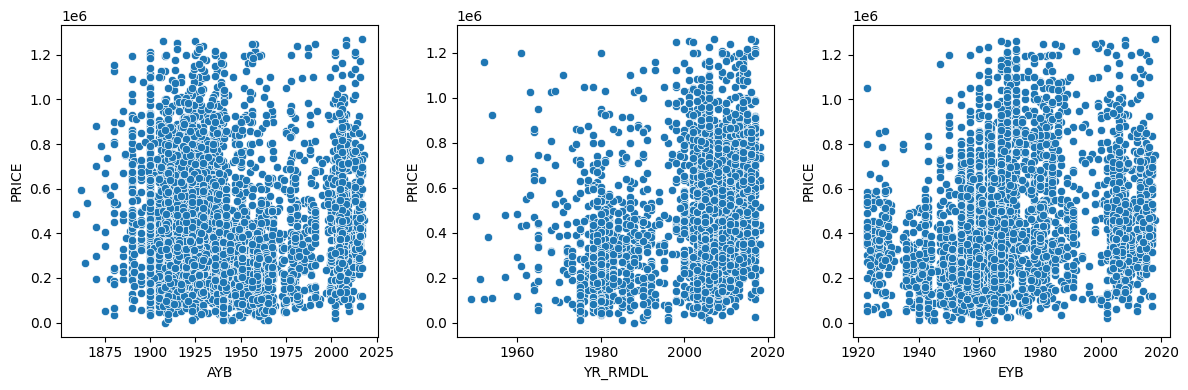

In [23]:
fig,axes=plt.subplots(1,3,figsize=[12,4])
sns.scatterplot(ax=axes[0],x=df_sample[df_sample['AYB']>area_lower[0]]['AYB'],y=df_sample[df_sample['PRICE']<price_upper]['PRICE'])
sns.scatterplot(ax=axes[1],x=df_sample[df_sample['YR_RMDL']>area_lower[1]]['YR_RMDL'],y=df_sample[df_sample['PRICE']<price_upper]['PRICE'])
sns.scatterplot(ax=axes[2],x=df_sample[df_sample['EYB']>area_lower[2]]['EYB'],y=df_sample[df_sample['PRICE']<price_upper]['PRICE'])
plt.tight_layout()

dari plot diatas tidak terlihat adanya hubungan linier yang jelas antara ketiga variabel tahun dengan variabel PRICE dimana observasi menyebar ke segala arah.

Dari seluruh variabel numerik di atas jika dilihat dengan scatter plot tidak terlihat pola korelasi yang jelas, akan tetapi dalam melihat korelasi tidak hanya menggunakan scatter plot dan masih ada cara lain seperti melihat nilai spearman yang akan kita analisa nanti.

### **Persebaran lokasi**

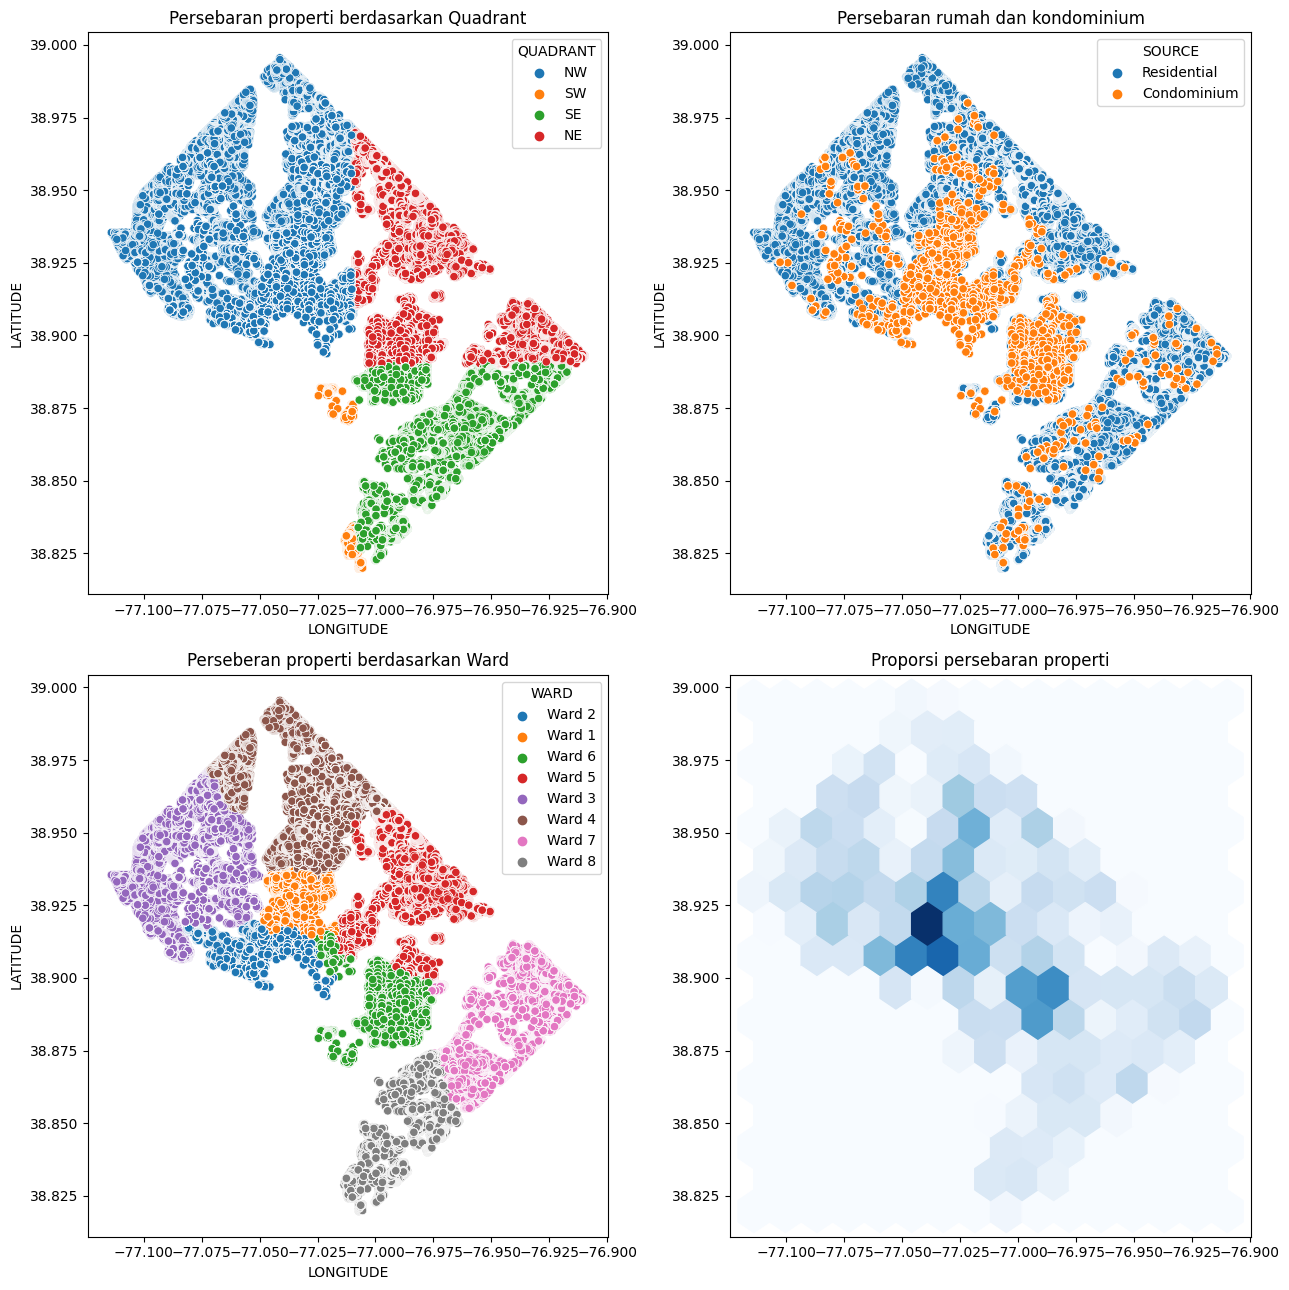

In [24]:
fig, axes= plt.subplots(2,2,figsize=[13,13])

sns.scatterplot(ax=axes[0,0],x=df['LONGITUDE'],y=df['LATITUDE'],hue=df['QUADRANT'])
axes[0,0].set_title('Persebaran properti berdasarkan Quadrant')

sns.scatterplot(ax=axes[0,1],x=df['LONGITUDE'],y=df['LATITUDE'],hue=df['SOURCE'])
axes[0,1].set_title('Persebaran rumah dan kondominium')

sns.scatterplot(ax=axes[1,0],x=df['LONGITUDE'],y=df['LATITUDE'],hue=df['WARD'])
axes[1,0].set_title('Perseberan properti berdasarkan Ward')

axes[1,1].hexbin(x=df['LONGITUDE'],y=df['LATITUDE'],gridsize=15,cmap='Blues')
axes[1,1].set_title('Proporsi persebaran properti')

plt.tight_layout()

Berdasarkan Plot di atas, lokasi properti di dataset secara geografis terbagi menjadi 4 yaitu North West (NW), South West (SW), North East (NE), dan South East. Sementara secara administratif lokasi properti tersebar di 8 area yang disebut 'Ward'. Dari segi kepadatan, mayoritas properti berada di pusat yaitu di perbatasan area NW dan NE atau di ward 2, 1, dan 6. Dimana ini terjadi karena di wilayah pusat perumahan tumpang tindih dengan kondominium. Adapaun kondominium hanya terletak di pusat saja dan tidak ada yang di pinggir area dan hanya perumahan yang mengisi area pinggir.

Jika kita meminta saran ketika membeli rumah, kebanyakan orang akan menyarankan kita untuk mempertimbangkan lokasi dari rumah ataupun properti yang akan kita beli, apakah ruma tersebut dekat dengan sekolah? berapa lama jarak ke pusat kota? dan pertanyaan lainnya. Dengan asumsi bahwa properti di lokasi yang bagus akan memiliki harga yang tinggi, mari kita lihat berapa rata-rata harga di masing-masing area.

In [25]:
price_area=df.pivot_table(index='QUADRANT',columns='SOURCE',values='PRICE',aggfunc='median')
display(price_area)

price_area2=df.pivot_table(index='WARD',columns='SOURCE',values='PRICE',aggfunc='median')
display(price_area2)


SOURCE,Condominium,Residential
QUADRANT,,
NE,305000.00,350000.00
NW,399900.00,660000.00
SE,199900.00,279900.00
SW,275000.00,280000.00


SOURCE,Condominium,Residential
WARD,,
Ward 1,432000.00,570000.00
Ward 2,420000.00,1050000.00
Ward 3,334500.00,890790.00
Ward 4,280000.00,462000.00
Ward 5,296885.00,381000.00
Ward 6,385000.00,581500.00
Ward 7,137500.00,220000.00
Ward 8,155000.00,215000.00


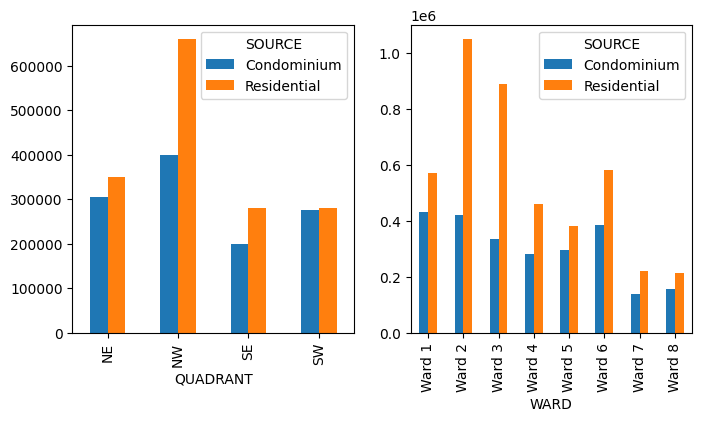

In [26]:
fig , axes=plt.subplots(1,2,figsize=[8,4])

price_area.plot.bar(ax=axes[0])
price_area2.plot.bar(ax=axes[1])

plt.show()

Dari tabel dan plot di atas, bisa kita katakan asumsi kita benar dimana rumah yang berada di pusat kota memiliki harga yang lebih tinggi dibanding area lainnya, dan bisa kita anggap area seperti NW atau Ward 2 merupakan lokasi terbaik dan strategis di Washington DC dimana properti disini umumnya memiliki harga yang tinggi.

### **Korelasi**

C:\Users\User\AppData\Local\Temp\ipykernel_12528\1765381425.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr('spearman'),annot=True)


<Axes: >

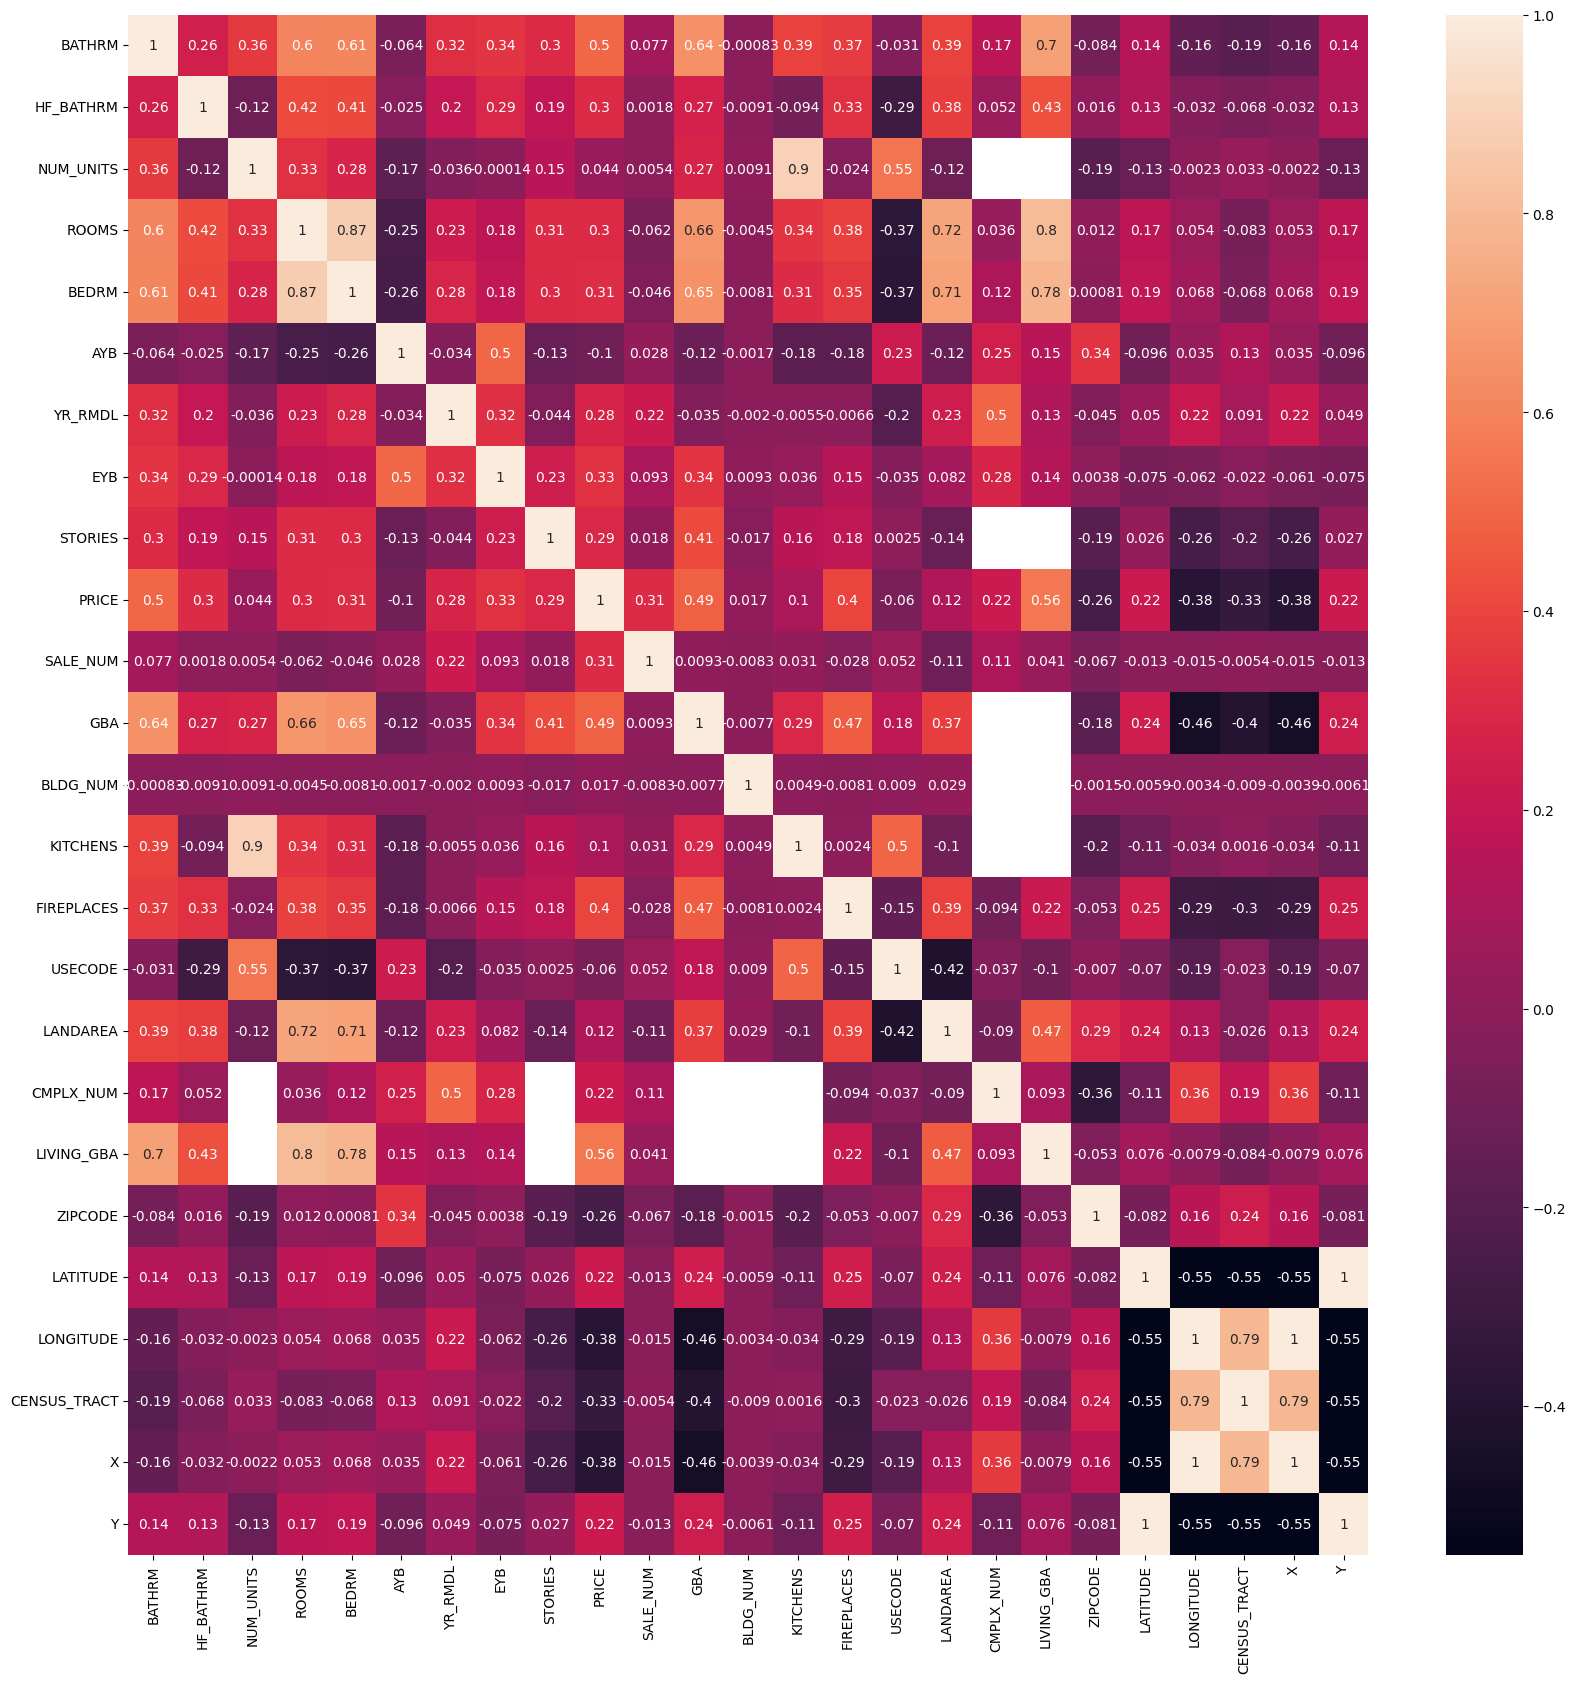

In [27]:
plt.figure(figsize=[20,20])
sns.heatmap(df.corr('spearman'),annot=True)

Sebelumnya ada beberapa variable yang kita coba lihat hubungannya dengan variabel PRICE melalui scatter plot dimana ada yang seperti memiliki hubungan dan ada yang tidak menunjukkan pola hubungan antara 2 variabel. Dengan heatmap, kita akan coba melihat sekali lagi hubungan variabel feature dengan outcome variabel menggunakan nilai spearman. Ada beberapa variabel yang menarik untuk diamati:
- LIVING_GBA = 0.56, pada scatter plot terlihat ada pola liner dan hal ini didukung oleh nilai spearman sebesar 0.56 yang menandakan adanya hubungan positif yang cukup kuat antara variabel ini dengan PRICE
- GBA = 0.49, pada scatter plot pola liniernya terlihat tapi masih kurang terbentuk akan tetapi nilai spearmannya lumayan kuat yang menandakan adanya hubungan positif antara variabel ini dengan variabel PRICE
- LANDAREA= 0.12, pada scatter plot tidak terlihat pola linier dan nilai spearmannya menunjukkan bahwa hubungan variabel ini dengan variabel PRICE lemah.
- AYB = -0.1, pada scatter plot tidak terlihat pola yang jelas dan nilai spearman menunjukkan bahwa ada hubungan negatif antara variabel ini dan PRICE tetapi sangat lemah
- YR_RMDL = 0.28, pada scatter plot tidak terliha pola yang jelas tapi nilai spearman menunjukkan bahwa ada hubungan positif antara variabel ini dan PRICE tetapi sangat lemah
- EYB = 0.33, pada scatter plot tidak terliha pola yang jelas tapi nilai spearman menunjukkan bahwa ada hubungan positif antara variabel ini dan PRICE tetapi sangat lemah

Selain itu variabel dengan kateogori ruangan memiliki korelasi yang kuat antar sesama kategori. Begitu juga variabel dengan kategori luas memiliki korelasi yang kuat dengan variable ruangan. Hal ini menandakan adanya masalah multikolinieritas. Kemudian ada variabel yang antar keduanya memiliki missing value sehingga tidak bisa dinilai korelasinya.

### **Distribusi categorical feature**


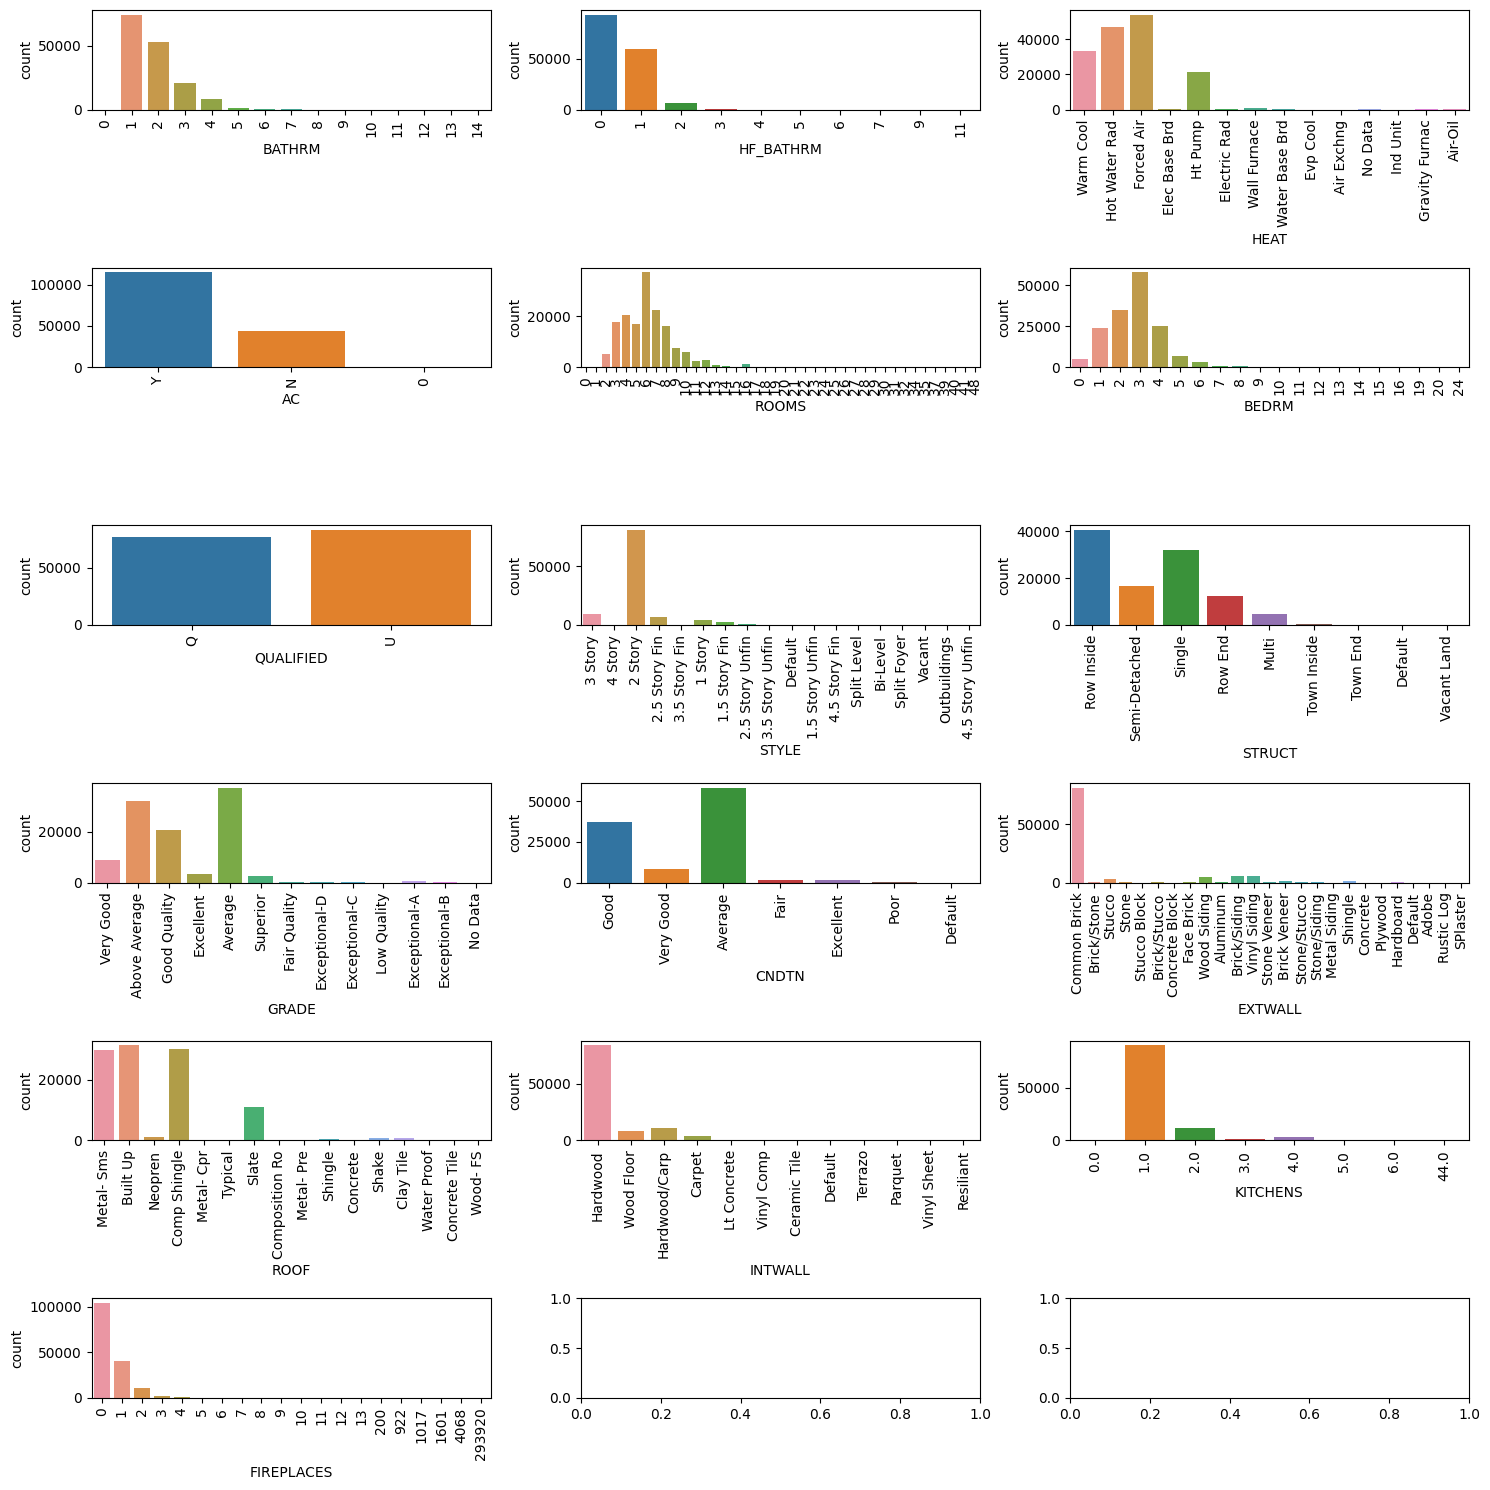

In [28]:
cat_feature=['BATHRM','HF_BATHRM','HEAT','AC','ROOMS', 'BEDRM','QUALIFIED','STYLE', 'STRUCT', 'GRADE','CNDTN','EXTWALL', 'ROOF','INTWALL', 'KITCHENS', 'FIREPLACES']
count_row=0
count_col=0
fig,axes=plt.subplots(6,3,figsize=[15,15])

for i in cat_feature:
    axes[count_row,count_col].tick_params(axis='x',rotation=90)
    sns.countplot(ax=axes[count_row,count_col],x=df[i])
    
    fig.tight_layout()
    
    
    count_col+=1
    if count_col>2:
        count_col=0
        count_row+=1
    


Dari plot di atas, ada beberapa feature yang memiliki 0 sebagai unique value seperti ROOMS dan AC. Untuk AC kita  bisa menganggap bahwa 0 adalah missing value, akan tetapi untuk ROOMS harus dianalisa lebih lanjut untuk menentukan apakah ini missing value ataupun properti tersebut tidak ada ruangan sama sekali.

In [29]:
df[df['HEAT']=='No Data']

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
2337,3,1,No Data,Y,2.00,9,4,1906.00,NaN,1969,...,-77.03,Old City 2,040 F Old City 2,4400.00,004400 1016,Ward 1,273,-77.03,38.92,NW
2859,0,0,No Data,N,1.00,0,0,1892.00,2000.00,1954,...,-77.04,Old City 2,040 D Old City 2,4201.00,004201 2006,Ward 2,152,-77.04,38.91,NW
4363,1,1,No Data,N,1.00,6,3,1865.00,2002.00,1967,...,-77.03,Old City 2,040 C Old City 2,5002.00,005002 1000,Ward 2,314,-77.03,38.91,NW
7091,0,0,No Data,N,1.00,6,3,1925.00,NaN,1943,...,-77.00,Old City 1,039 L Old City 1,10600.00,010600 2013,Ward 6,773,-77.00,38.90,NE
7422,1,0,No Data,N,1.00,6,3,1909.00,NaN,1954,...,-77.00,Old City 1,039 L Old City 1,10600.00,010600 2050,Ward 6,776,-77.00,38.90,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155322,2,0,No Data,Y,NaN,4,2,1870.00,2016.00,1919,...,-77.03,Old City 2,040 E Old City 2,4400.00,NaN,Ward 1,306,-77.03,38.91,NW
155323,2,0,No Data,Y,NaN,4,2,1870.00,2016.00,1919,...,-77.03,Old City 2,040 E Old City 2,4400.00,NaN,Ward 1,306,-77.03,38.91,NW
155324,2,0,No Data,Y,NaN,4,2,1870.00,2016.00,1919,...,-77.03,Old City 2,040 E Old City 2,4400.00,NaN,Ward 1,306,-77.03,38.91,NW
156940,1,0,No Data,N,NaN,3,1,1967.00,NaN,1967,...,-77.02,Southwest Waterfront,NaN,10200.00,NaN,Ward 6,468,-77.02,38.88,SW


In [30]:
df[df['ROOMS']==0].head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
1196,2,0,Hot Water Rad,N,1.00,0,0,1906.00,NaN,1954,...,-77.02,Old City 2,040 G Old City 2,4801.00,004801 1002,Ward 6,441,-77.02,38.91,NW
2859,0,0,No Data,N,1.00,0,0,1892.00,2000.00,1954,...,-77.04,Old City 2,040 D Old City 2,4201.00,004201 2006,Ward 2,152,-77.04,38.91,NW
3048,2,0,Water Base Brd,N,2.00,0,0,1900.00,2009.00,1967,...,-77.02,Old City 2,040 B Old City 2,4801.00,004801 1017,Ward 6,444,-77.02,38.91,NW
3059,2,0,Hot Water Rad,N,1.00,0,0,1900.00,NaN,1957,...,-77.02,Old City 2,040 B Old City 2,4801.00,004801 1017,Ward 6,444,-77.02,38.91,NW
3064,2,0,Water Base Brd,N,1.00,0,0,1900.00,NaN,1957,...,-77.02,Old City 2,040 B Old City 2,4801.00,004801 1017,Ward 6,444,-77.02,38.91,NW


Karena  feature ROOMS memiliki korelasi dengan feature yang berhubungan dengan ruangan seperti BATHRM, maka kita akan menentukan berdasarkan feature-feature ini. Dan bisa dilihat bahwa pada observasi dengan nilai ROOMS == 0, variabel BATHRM tidak sama dengan 0 walaupun ada yang benar-benar kosong sepenuhnya. Dengan mempertimbangkan bahwa tidak mungkin suatu properti tidak memiliki ruangan maka akan kita anggap 0 sama dengan missing value.

### **Identifikasi missing value**

In [31]:
df.loc[df['ROOMS']==0,'ROOMS']=np.NaN

In [32]:
df.loc[df['AC']=='0','AC']=np.NaN

In [33]:
missing_value=pd.DataFrame(df.isnull().sum())
missing_value['percentage']=round((missing_value[0]/len(df))*100,2)
missing_value.reset_index(inplace=True)
missing_value.rename(columns={'index':'column',0:'sum'}).sort_values(by='sum',ascending=False)


,column,sum,percentage
31,LIVING_GBA,106696,67.12
30,CMPLX_NUM,106696,67.12
8,YR_RMDL,78029,49.09
12,PRICE,60741,38.21
32,FULLADDRESS,52917,33.29
33,CITY,52906,33.28
42,CENSUS_BLOCK,52906,33.28
34,STATE,52906,33.28
36,NATIONALGRID,52906,33.28
10,STORIES,52305,32.91


<Axes: >

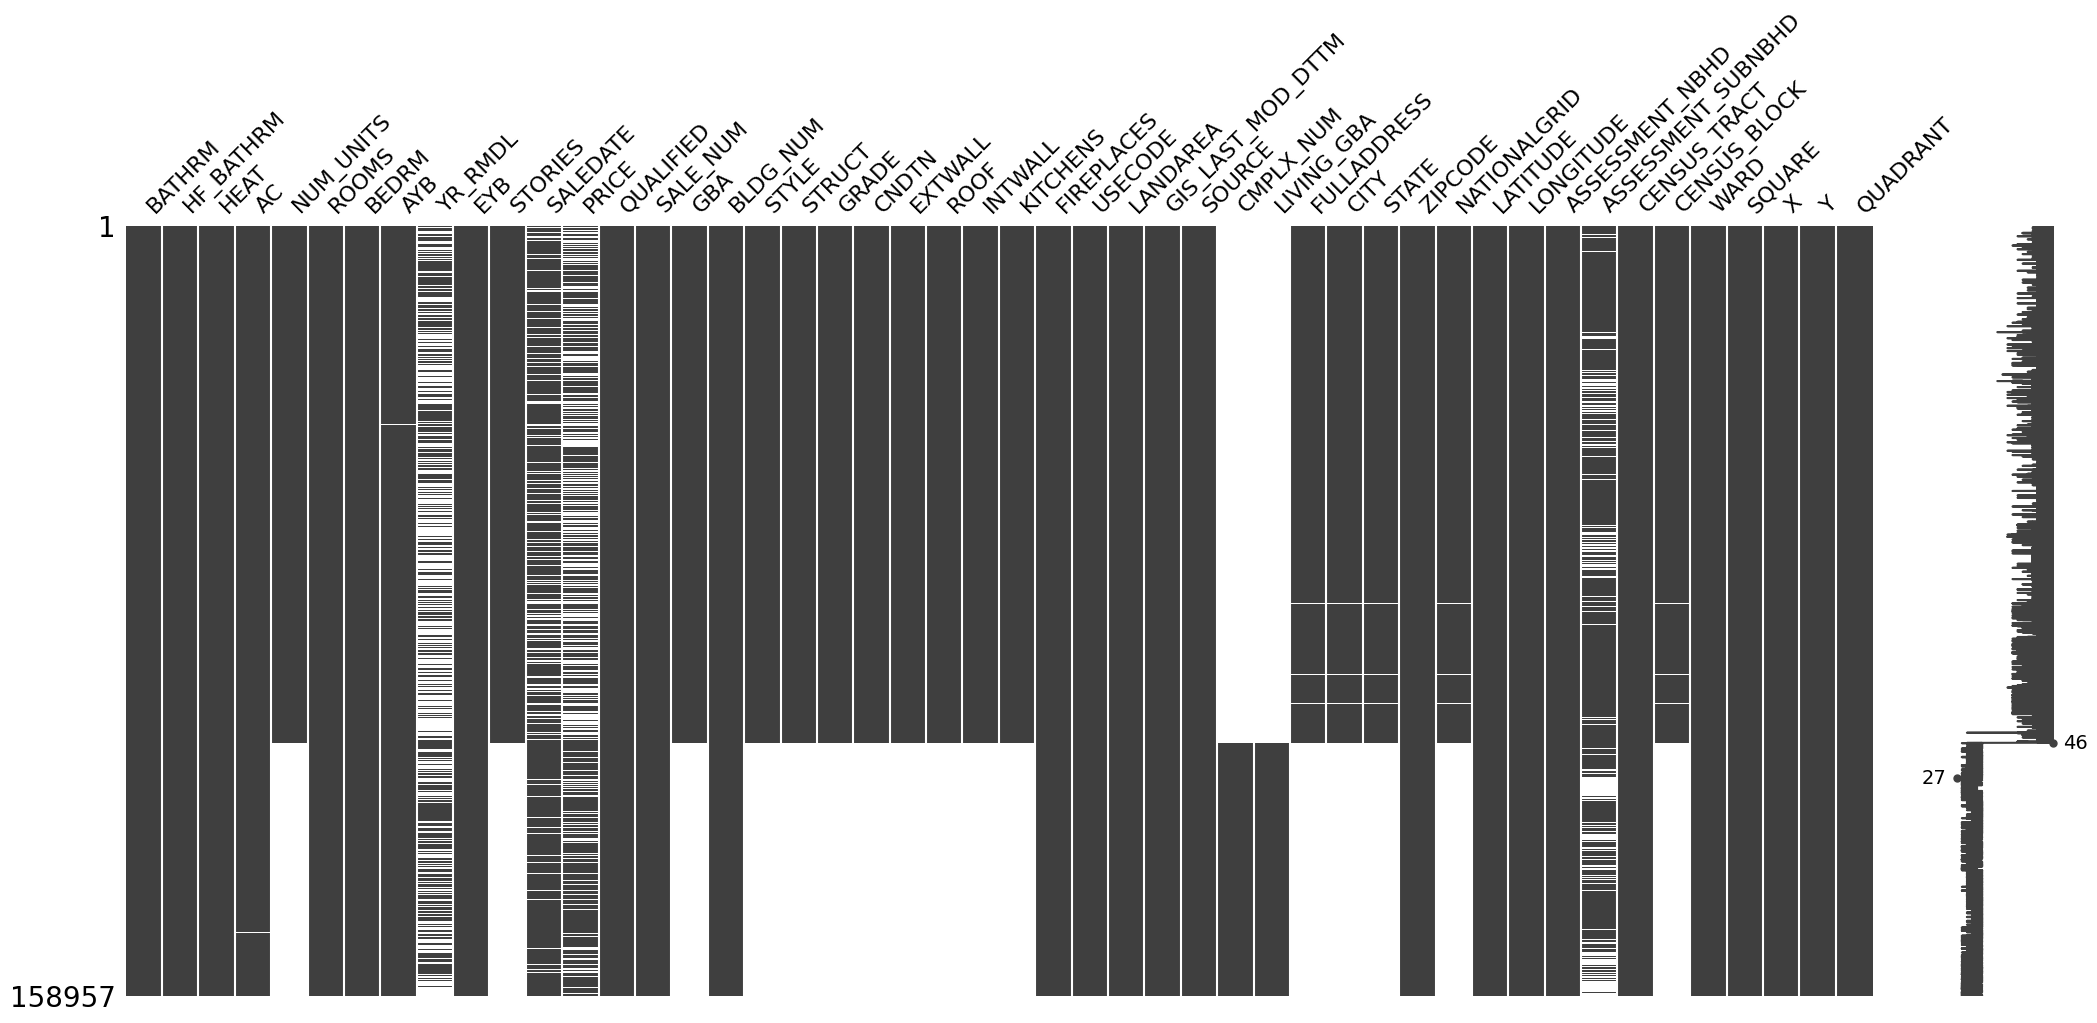

In [34]:
missingno.matrix(df)

Dalam dataset ini ada beberapa feature yang memiliki missing value yang dikarenakan penggabungan dataset Residential dan Condominium. Feature yang memiliki missing value karena hal ini adalah:
- 'NUM_UNITS',STORIES,GBA,'STYLE', 'STRUCT', 'GRADE', 'CNDTN',EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS','CMPLX_NUM', 'LIVING_GBA'
